We are going to consider a version of the well known Wilson-Cowan model, this particularly simple version, it can get very complicated, is taken from

Angela C. E. Onslow, Matthew W. Jones, Rafal Bogacz (2014) *A Canonical Circuit for Generating Phase-Amplitude Coupling*. PLoS One 9:e102591

Lets consider a cicuit containing a population of pyramidal neurons
$$\tau_E\frac{dE}{dt}=-E+f(\theta_{EE}+w_{EE}E-w_{IE}I)$$
and a population of inhibatory interneurons
$$\tau_I\frac{dI}{dt}=-I+f(\theta_{I}+w_{EI}E)$$
Here $\theta_E$ and $\theta_I$ are external inputs to the two populations, there $w$'s are the couplings and the $f(\theta)$ is the response function:
$$f(\theta)=\frac{1}{1+\exp{[-\beta(\theta-1})]}$$
Here you can think of $E$ and $I$ as some sort of activity level for the neurons while $f(\theta) converts that into some measure of the affect the neurons have on each other, this might correspond to firing rate, but we are going to be careful to not make this too exact!

In what follows we will use the parameters from the paper, in particular this will have $\beta=4$. Lets plot it to see what it looks like.

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def f(theta,beta):
    return 1/(1+np.exp(-beta*(theta-1)))

beta=4.0

theta0=-1.0
theta1= 3.0
n_points=200

t=np.linspace(theta0,theta1,n_points)
f_values=f(t,beta)

print(f(0,beta))


plt.figure(figsize=(6, 4))
plt.plot(t, f_values)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

You will notice that when $\theta=0$ the curve isn't zero, $f(0)\approx 0.018$ when you'd think that when a population of neurons have zero activity it will have no affect on any other neurons. In fact, other versions of this model go to some trouble to make sure this follows, in this paper the authors have chosen not to worry about this complication since 0.018 is so small it won't make much difference.

Here are the other parameter values: $\theta_E=0.5$ whereas $\theta_I=0.0$; $w_{EE} = 2.4$, $w_{EI} =w_{IE}=2.0$ and $\tau_E = \tau_I = 0.0032$ s. Lets do a simulation.

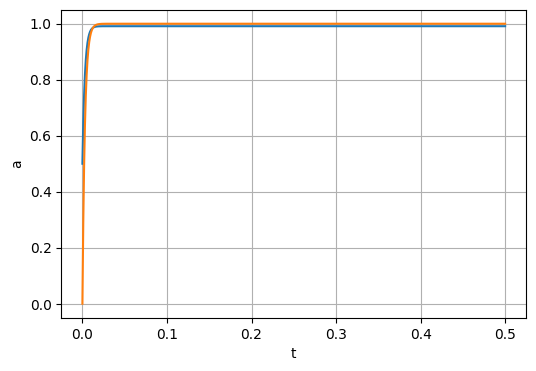

In [36]:
def f(theta,beta):
    return 1/(1+np.exp(-beta*(theta-1)))

def dadt(a,tau,beta,input):
  return (-a+f(input,beta))/tau

beta=4.0

tau_E=0.0032
tau_I=0.0032

w_EE=2.4
w_IE=2.0
w_EI=2.0

theta_E=0.5
theta_I=0.0

t0=0
t1=0.5
n_points=1000

t=np.linspace(t0,t1,n_points)
delta=(t1-t0)/n_points


e=np.full_like(t, 0.5)
h=np.full_like(t, 0.0)
#avoid using "i" as a variable, since we often use i for an index
#it is easy to make a mistake, it is common to use h in this situation
#I imagine for iHibatory.

for t_index in range(1,n_points):
  e_input=theta_E+w_EE*e[t_index-1]-w_IE*h[t_index-1]
  e[t_index]=e[t_index-1]+delta*dadt(e[t_index-1],tau_E,beta,e_input)
  h_input=theta_I+w_EI*e[t_index-1]
  h[t_index]=h[t_index-1]+delta*dadt(h[t_index-1],tau_I,beta,h_input)


plt.figure(figsize=(6, 4))
plt.plot(t, e,label=r"$e$")
plt.plot(t, h,label=r"$h$")
plt.xlabel('t')
plt.ylabel('a')
plt.grid(True)
plt.show()

This circuit only oscillates for some values of $\theta_E$, if the input is too strong, or not strong enough, it doesn't oscillate. Lets check on that, so first lets run the circuit, give it a little while to settle down and then find the minimum and maximum values.

In [ ]:
def f(theta,beta):
    return 1/(1+np.exp(-beta*(theta-1)))

def dadt(a,tau,beta,input):
  return (-a+f(input,beta))/tau

beta=4.0

tau_E=0.0032
tau_I=0.0032

w_EE=2.4
w_IE=2.0
w_EI=2.0

theta_E=0.5
theta_I=0.0

t0=0
t1=0.5
n_points1=500
n_points =1000

t=np.linspace(t0,t1,n_points)
delta=(t1-t0)/n_points


e=np.full_like(t, 0.5)
h=np.full_like(t, 0.0)

for t_index in range(1,n_points):
  e_input=theta_E+w_EE*e[t_index-1]-w_IE*h[t_index-1]
  e[t_index]=e[t_index-1]+delta*dadt(e[t_index-1],tau_E,beta,e_input)
  h_input=theta_I+w_EI*e[t_index-1]
  h[t_index]=h[t_index-1]+delta*dadt(h[t_index-1],tau_I,beta,h_input)

e_max=max(e[n_points1:])
e_min=min(e[n_points1:])

print(e_max,e_min)


So lets plot the minimum and maximum values as a function of $\theta_E$; if they are the same there is no oscillation.

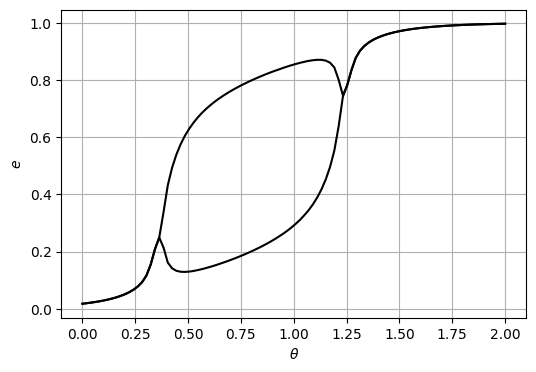

In [30]:
def f(theta,beta):
    return 1/(1+np.exp(-beta*(theta-1)))

def dadt(a,tau,beta,input):
  return (-a+f(input,beta))/tau

beta=4.0

tau_E=0.0032
tau_I=0.0032

w_EE=2.4
w_IE=2.0
w_EI=2.0

theta_points=100
theta0=0.0
theta1=2.0
theta_E_values=np.linspace(theta0,theta1,theta_points)
theta_I=0.0

t0=0
t1=0.5
n_points1=500
n_points =1000

t=np.linspace(t0,t1,n_points)
delta=(t1-t0)/n_points

e_max=[]
e_min=[]

for theta_E in theta_E_values:
  e=np.full_like(t, 0.5)
  h=np.full_like(t, 0.0)

  for t_index in range(1,n_points):
    e_input=theta_E+w_EE*e[t_index-1]-w_IE*h[t_index-1]
    e[t_index]=e[t_index-1]+delta*dadt(e[t_index-1],tau_E,beta,e_input)
    h_input=theta_I+w_EI*e[t_index-1]
    h[t_index]=h[t_index-1]+delta*dadt(h[t_index-1],tau_I,beta,h_input)

  e_max.append(max(e[n_points1:]))
  e_min.append(min(e[n_points1:]))

plt.figure(figsize=(6, 4))
plt.plot(theta_E_values, e_max,  color='black')
plt.plot(theta_E_values, e_min,  color='black')
plt.xlabel(r'$\theta_E$')
plt.ylabel(r'$e$')
plt.grid(True)
plt.show()

With $\theta_E=1.5$ consider what happens for increasing values of $\theta_I$.

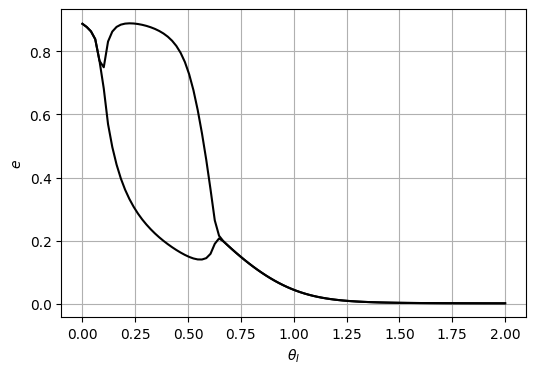

In [37]:
def f(theta,beta):
    return 1/(1+np.exp(-beta*(theta-1)))

def dadt(a,tau,beta,input):
  return (-a+f(input,beta))/tau

beta=4.0

tau_E=0.0032
tau_I=0.0032

w_EE=2.4
w_IE=2.0
w_EI=2.0

theta_points=100
theta0=0.0
theta1=2.0
theta_I_values=np.linspace(theta0,theta1,theta_points)
theta_E=1.3

t0=0
t1=0.5
n_points1=500
n_points =1000

t=np.linspace(t0,t1,n_points)
delta=(t1-t0)/n_points

e_max=[]
e_min=[]

for theta_I in theta_I_values:
  e=np.full_like(t, 0.5)
  h=np.full_like(t, 0.0)

  for t_index in range(1,n_points):
    e_input=theta_E+w_EE*e[t_index-1]-w_IE*h[t_index-1]
    e[t_index]=e[t_index-1]+delta*dadt(e[t_index-1],tau_E,beta,e_input)
    h_input=theta_I+w_EI*e[t_index-1]
    h[t_index]=h[t_index-1]+delta*dadt(h[t_index-1],tau_I,beta,h_input)

  e_max.append(max(e[n_points1:]))
  e_min.append(min(e[n_points1:]))

plt.figure(figsize=(6, 4))
plt.plot(theta_I_values, e_max,  color='black')
plt.plot(theta_I_values, e_min,  color='black')
plt.xlabel(r'$\theta_I$')
plt.ylabel(r'$e$')
plt.grid(True)
plt.show()